In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV

In [ ]:
cc = pd.read_excel("default of credit card clients.xls")

In [ ]:
cc

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df = cc.drop(['ID'], axis=1)

In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
print(df.isnull().all())

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool


In [ ]:
print(df.describe())

           X1     X2     X3     X4     X5     X6     X7     X8     X9    X10  \
count   30001  30001  30001  30001  30001  30001  30001  30001  30001  30001   
unique     82      3      8      5     57     12     12     12     12     11   
top     50000      2      2      2     29      0      0      0      0      0   
freq     3365  18112  14030  15964   1605  14737  15730  15764  16455  16947   

        ...    X15    X16    X17    X18    X19    X20    X21    X22    X23  \
count   ...  30001  30001  30001  30001  30001  30001  30001  30001  30001   
unique  ...  21549  21011  20605   7944   7900   7519   6938   6898   6940   
top     ...      0      0      0      0      0      0      0      0      0   
freq    ...   3195   3506   4020   5249   5396   5968   6408   6703   7173   

            Y  
count   30001  
unique      3  
top         0  
freq    23364  

[4 rows x 24 columns]


In [ ]:
df.columns = df.iloc[0]
df = df.drop(index=0)
df['default payment next month'] = df['default payment next month'].astype(bool)   

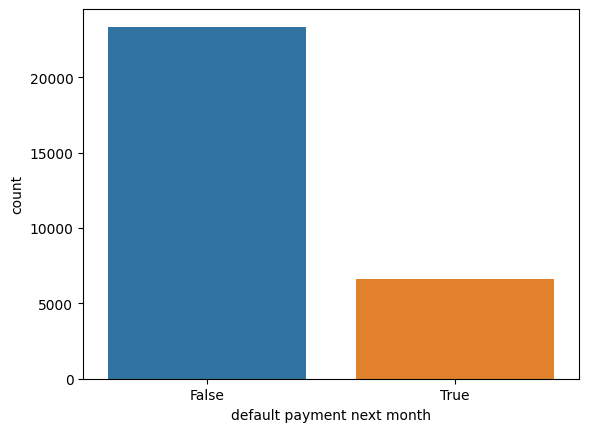

In [ ]:
# Check the class distribution
sns.countplot(x="default payment next month", data=df)
plt.show()

In [ ]:
df["default payment next month"].value_counts()

False    23364
True      6636
Name: default payment next month, dtype: int64

In [ ]:
# Split the dataset into features and target
X = df.drop("default payment next month", axis=1)
y = df["default payment next month"]

In [ ]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
y.value_counts()

True     23364
False    23364
Name: default payment next month, dtype: int64

In [ ]:
# split into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


In [ ]:
# Recursive Feature Elimination with cross-validation for feature selection
estimator = RandomForestClassifier()
selector = RFECV(estimator, step=1, cv=10)
selector = selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

      feature  importance
5       PAY_0    0.126117
6       PAY_2    0.070680
3    MARRIAGE    0.064396
7       PAY_3    0.061188
1         SEX    0.056387
2   EDUCATION    0.046950
8       PAY_4    0.045051
11  BILL_AMT1    0.042214
0   LIMIT_BAL    0.040311
4         AGE    0.040206
17   PAY_AMT1    0.037662
12  BILL_AMT2    0.034842
9       PAY_5    0.033169
18   PAY_AMT2    0.032742
13  BILL_AMT3    0.032236
19   PAY_AMT3    0.031965
15  BILL_AMT5    0.030745
14  BILL_AMT4    0.030391
22   PAY_AMT6    0.029338
16  BILL_AMT6    0.029251
10      PAY_6    0.028638
20   PAY_AMT4    0.028468
21   PAY_AMT5    0.027052


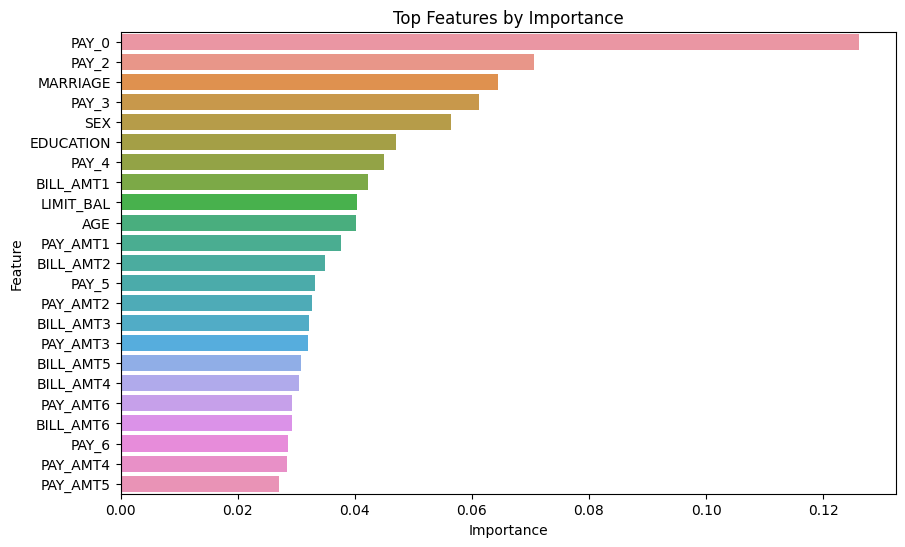

In [ ]:
# Print the top features and their importance
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': selector.estimator_.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)
# Create a chart showing the top features and their importance
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importances)
plt.title("Top Features by Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

# train and evaluate models
models = {
    "ANN": MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier()
    
}

results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)

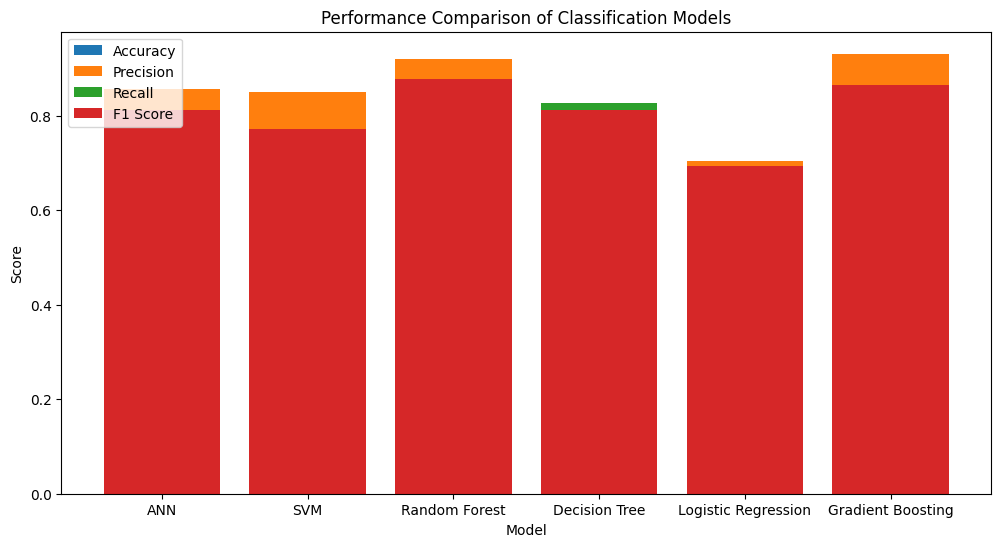

In [ ]:
# plot bar chart of results
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(results["Model"], results["Accuracy"], label="Accuracy")
ax.bar(results["Model"], results["Precision"], label="Precision")
ax.bar(results["Model"], results["Recall"], label="Recall")
ax.bar(results["Model"], results["F1 Score"], label="F1 Score")
ax.set_title("Performance Comparison of Classification Models")
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.legend()
plt.show()

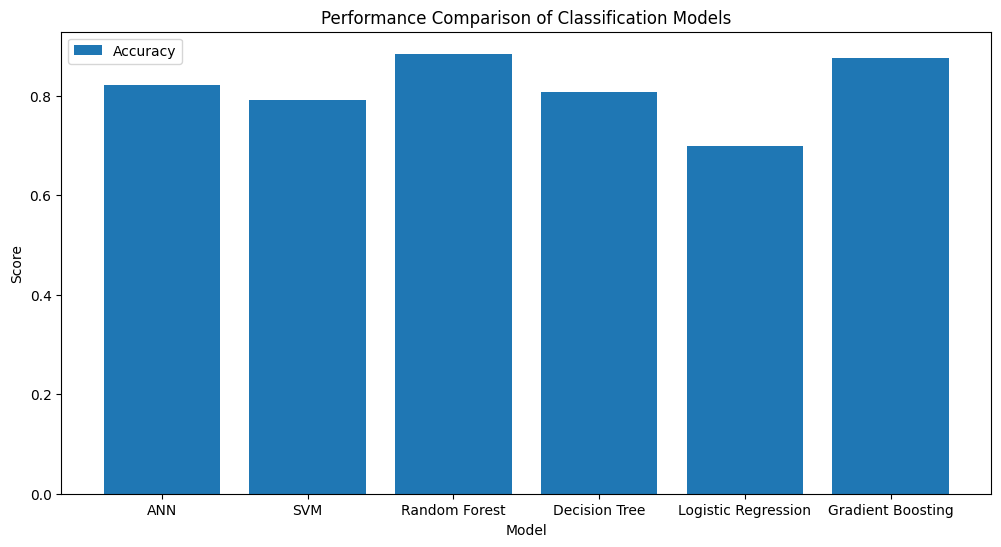

In [ ]:
# plot bar chart of results
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(results["Model"], results["Accuracy"], label="Accuracy")
ax.set_title("Performance Comparison of Classification Models")
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.legend()
plt.show()

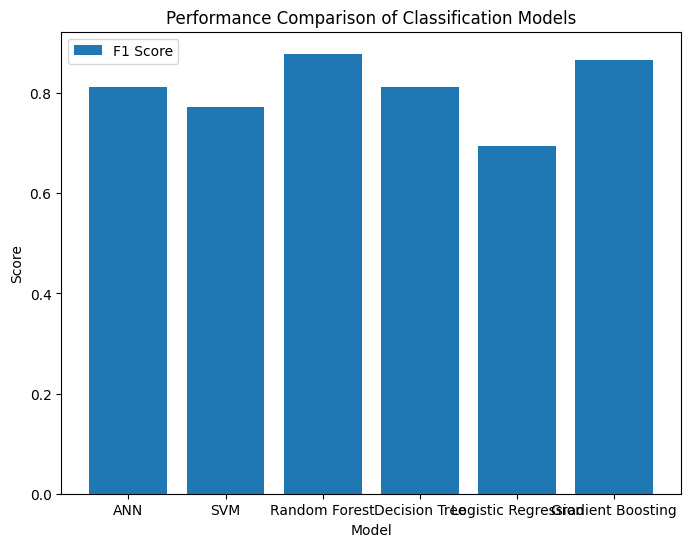

In [ ]:
# plot bar chart of results
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(results["Model"], results["F1 Score"], label="F1 Score")
ax.set_title("Performance Comparison of Classification Models")
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.legend()
plt.show()

In [ ]:
results

{'Model': ['ANN',
  'SVM',
  'Random Forest',
  'Decision Tree',
  'Logistic Regression',
  'Gradient Boosting'],
 'Accuracy': [0.8215279263856196,
  0.7921035737213782,
  0.8842285469719666,
  0.8081532206291462,
  0.6979456451958057,
  0.8750267494115129],
 'Precision': [0.8568036095939207,
  0.8505392912172574,
  0.9213799577563953,
  0.7972749793559042,
  0.7035651408450704,
  0.9315439546909628],
 'Recall': [0.772095013909694,
  0.7087524074470362,
  0.8401455167986305,
  0.8264498181040018,
  0.6841429488551252,
  0.8095441900278194],
 'F1 Score': [0.8122467357046376,
  0.7731994864013073,
  0.8788896351018581,
  0.8116002942103605,
  0.6937181295432353,
  0.8662697504007327]}